# **Similarity Matrix**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.style as style
%matplotlib inline
import seaborn as sns
sns.set_theme()
from scipy.spatial.distance import pdist, squareform
import warnings
warnings.filterwarnings('ignore')

## **Import dataset and feature engineering**

In [2]:
dataset = pd.read_csv("dataset.csv", sep = ',', index_col = 0)
dataset = dataset.drop_duplicates(keep = 'first')
dataset = dataset.drop(dataset[dataset['track_id'] == '1kR4gIb7nGxHPI3D2ifs59'].index)

dataset['explicit'] = dataset['explicit'].astype('str')
dataset['track_genre'] = dataset['track_genre'].astype('str')

dataset['artists'] = dataset['artists'].str.replace(';',', ')

dataset['artist_track'] = dataset[['artists', 'track_name']].agg(', '.join, axis=1)

dataset = dataset.drop_duplicates(subset = ['track_id'])

dataset = dataset.drop(columns = ['track_id', 'artists', 'album_name', 'track_name', 'track_genre'])

dataset['explicit'] = dataset['explicit'].replace(['False', 'True'], ['0', '1'])

dataset = dataset.loc[dataset['popularity'] > 40]

df = dataset.set_index('artist_track')

df[['popularity', 'explicit', 'key']] = df[['popularity', 'explicit', 'key']].astype(float)

# **Similarity Matrix**

In [3]:
pairwise = pd.DataFrame(squareform(pdist(df, 'mahalanobis')), columns = df.index, index = df.index)
pairwise = pairwise.reset_index()

In [4]:
def recos_matrix(track):
    df = pd.DataFrame(pairwise.loc[pairwise['artist_track'] == track]).transpose()
    df = df[1:]
    df = df.reset_index()
    df = df.iloc[:,:2] 
    df = df.set_axis(['track', 'distance'], axis = 1, inplace = False)
    df = df.sort_values(by = "distance", ascending = True)
    return list(df[1:4]['track'])

track = "ABBA, Dancing Queen"
recos_matrix(track)

['Dolly Parton, 9 to 5',
 'Morgan Wallen, You Proof',
 'Bee Gees, More Than A Woman - From "Saturday Night Fever" Soundtrack']

---

In [5]:
# Analysis of results based on 25 random tracks:
df_sample = dataset.sample(n = 25).set_index('artist_track')
df_sample[['popularity', 'explicit', 'key']] = df_sample[['popularity', 'explicit', 'key']].astype(float)
pairwise_sample = pd.DataFrame(squareform(pdist(df_sample, 'canberra')), 
                               columns = df_sample.index, index = df_sample.index)
np.round(pairwise_sample, decimals = 0)

artist_track,"Zhang Zhen Yue, 再見","Glass Animals, Heat Waves","K/DA, Madison Beer, (G)I-DLE, Lexie Liu, Jaira Burns, Seraphine, League of Legends, MORE","Kiko Blac, Bunny Girl Senpai Freestyle","AC/DC, Rock N Roll Train","Ayo Jay, Rotimi, 10 Over 10 (feat. Rotimi)","Valentín Elizalde, Flor de Capomo","Koo Koo Kanga Roo, Get Yo Body Movin'","glass beach, classic j dies and goes to hell part 1","Roy Davis Jr., Peven Everett, Gabriel - Live Garage Mix",...,"JJ Heller, Big Love, Small Moments","Whales, Jo Cohen, Love Is Gone","Mimi Webb, Ghost of You","sumika, ファンファーレ","Surf Mesa, Emilee, ily (i love you baby) (feat. Emilee)","one sonic society, Mike Weaver, Great Is Thy Faithfulness (Beginning to End) [feat. Mike Weaver] (feat. Mike Weaver)","Billie Eilish, NDA","KSHMR, Marnik, Mitika, Mandala (feat. Mitika) - Official Sunburn 2016 Anthem Extended","Mateo, Arinity, BIMINI, Free To Love","The Notorious B.I.G., Big Poppa - 2007 Remaster"
artist_track,,,,,,,,,,,,,,,,,,,,,
"Zhang Zhen Yue, 再見",0.0,3.0,5.0,6.0,4.0,3.0,4.0,3.0,6.0,5.0,...,4.0,4.0,3.0,3.0,5.0,5.0,4.0,5.0,4.0,5.0
"Glass Animals, Heat Waves",3.0,0.0,6.0,5.0,5.0,3.0,5.0,4.0,6.0,5.0,...,4.0,5.0,4.0,5.0,4.0,5.0,3.0,6.0,4.0,5.0
"K/DA, Madison Beer, (G)I-DLE, Lexie Liu, Jaira Burns, Seraphine, League of Legends, MORE",5.0,6.0,0.0,7.0,4.0,5.0,6.0,6.0,4.0,5.0,...,6.0,4.0,4.0,4.0,4.0,5.0,7.0,4.0,6.0,5.0
"Kiko Blac, Bunny Girl Senpai Freestyle",6.0,5.0,7.0,0.0,7.0,5.0,5.0,6.0,7.0,5.0,...,7.0,6.0,6.0,7.0,5.0,7.0,5.0,6.0,7.0,4.0
"AC/DC, Rock N Roll Train",4.0,5.0,4.0,7.0,0.0,6.0,5.0,5.0,6.0,6.0,...,6.0,5.0,4.0,3.0,5.0,6.0,6.0,5.0,6.0,7.0
"Ayo Jay, Rotimi, 10 Over 10 (feat. Rotimi)",3.0,3.0,5.0,5.0,6.0,0.0,4.0,4.0,4.0,3.0,...,5.0,4.0,4.0,5.0,4.0,5.0,4.0,5.0,5.0,4.0
"Valentín Elizalde, Flor de Capomo",4.0,5.0,6.0,5.0,5.0,4.0,0.0,4.0,6.0,6.0,...,5.0,6.0,5.0,4.0,5.0,6.0,5.0,6.0,6.0,6.0
"Koo Koo Kanga Roo, Get Yo Body Movin'",3.0,4.0,6.0,6.0,5.0,4.0,4.0,0.0,6.0,5.0,...,5.0,5.0,3.0,4.0,5.0,5.0,5.0,6.0,5.0,6.0
"glass beach, classic j dies and goes to hell part 1",6.0,6.0,4.0,7.0,6.0,4.0,6.0,6.0,0.0,5.0,...,6.0,4.0,6.0,6.0,4.0,5.0,8.0,5.0,5.0,7.0


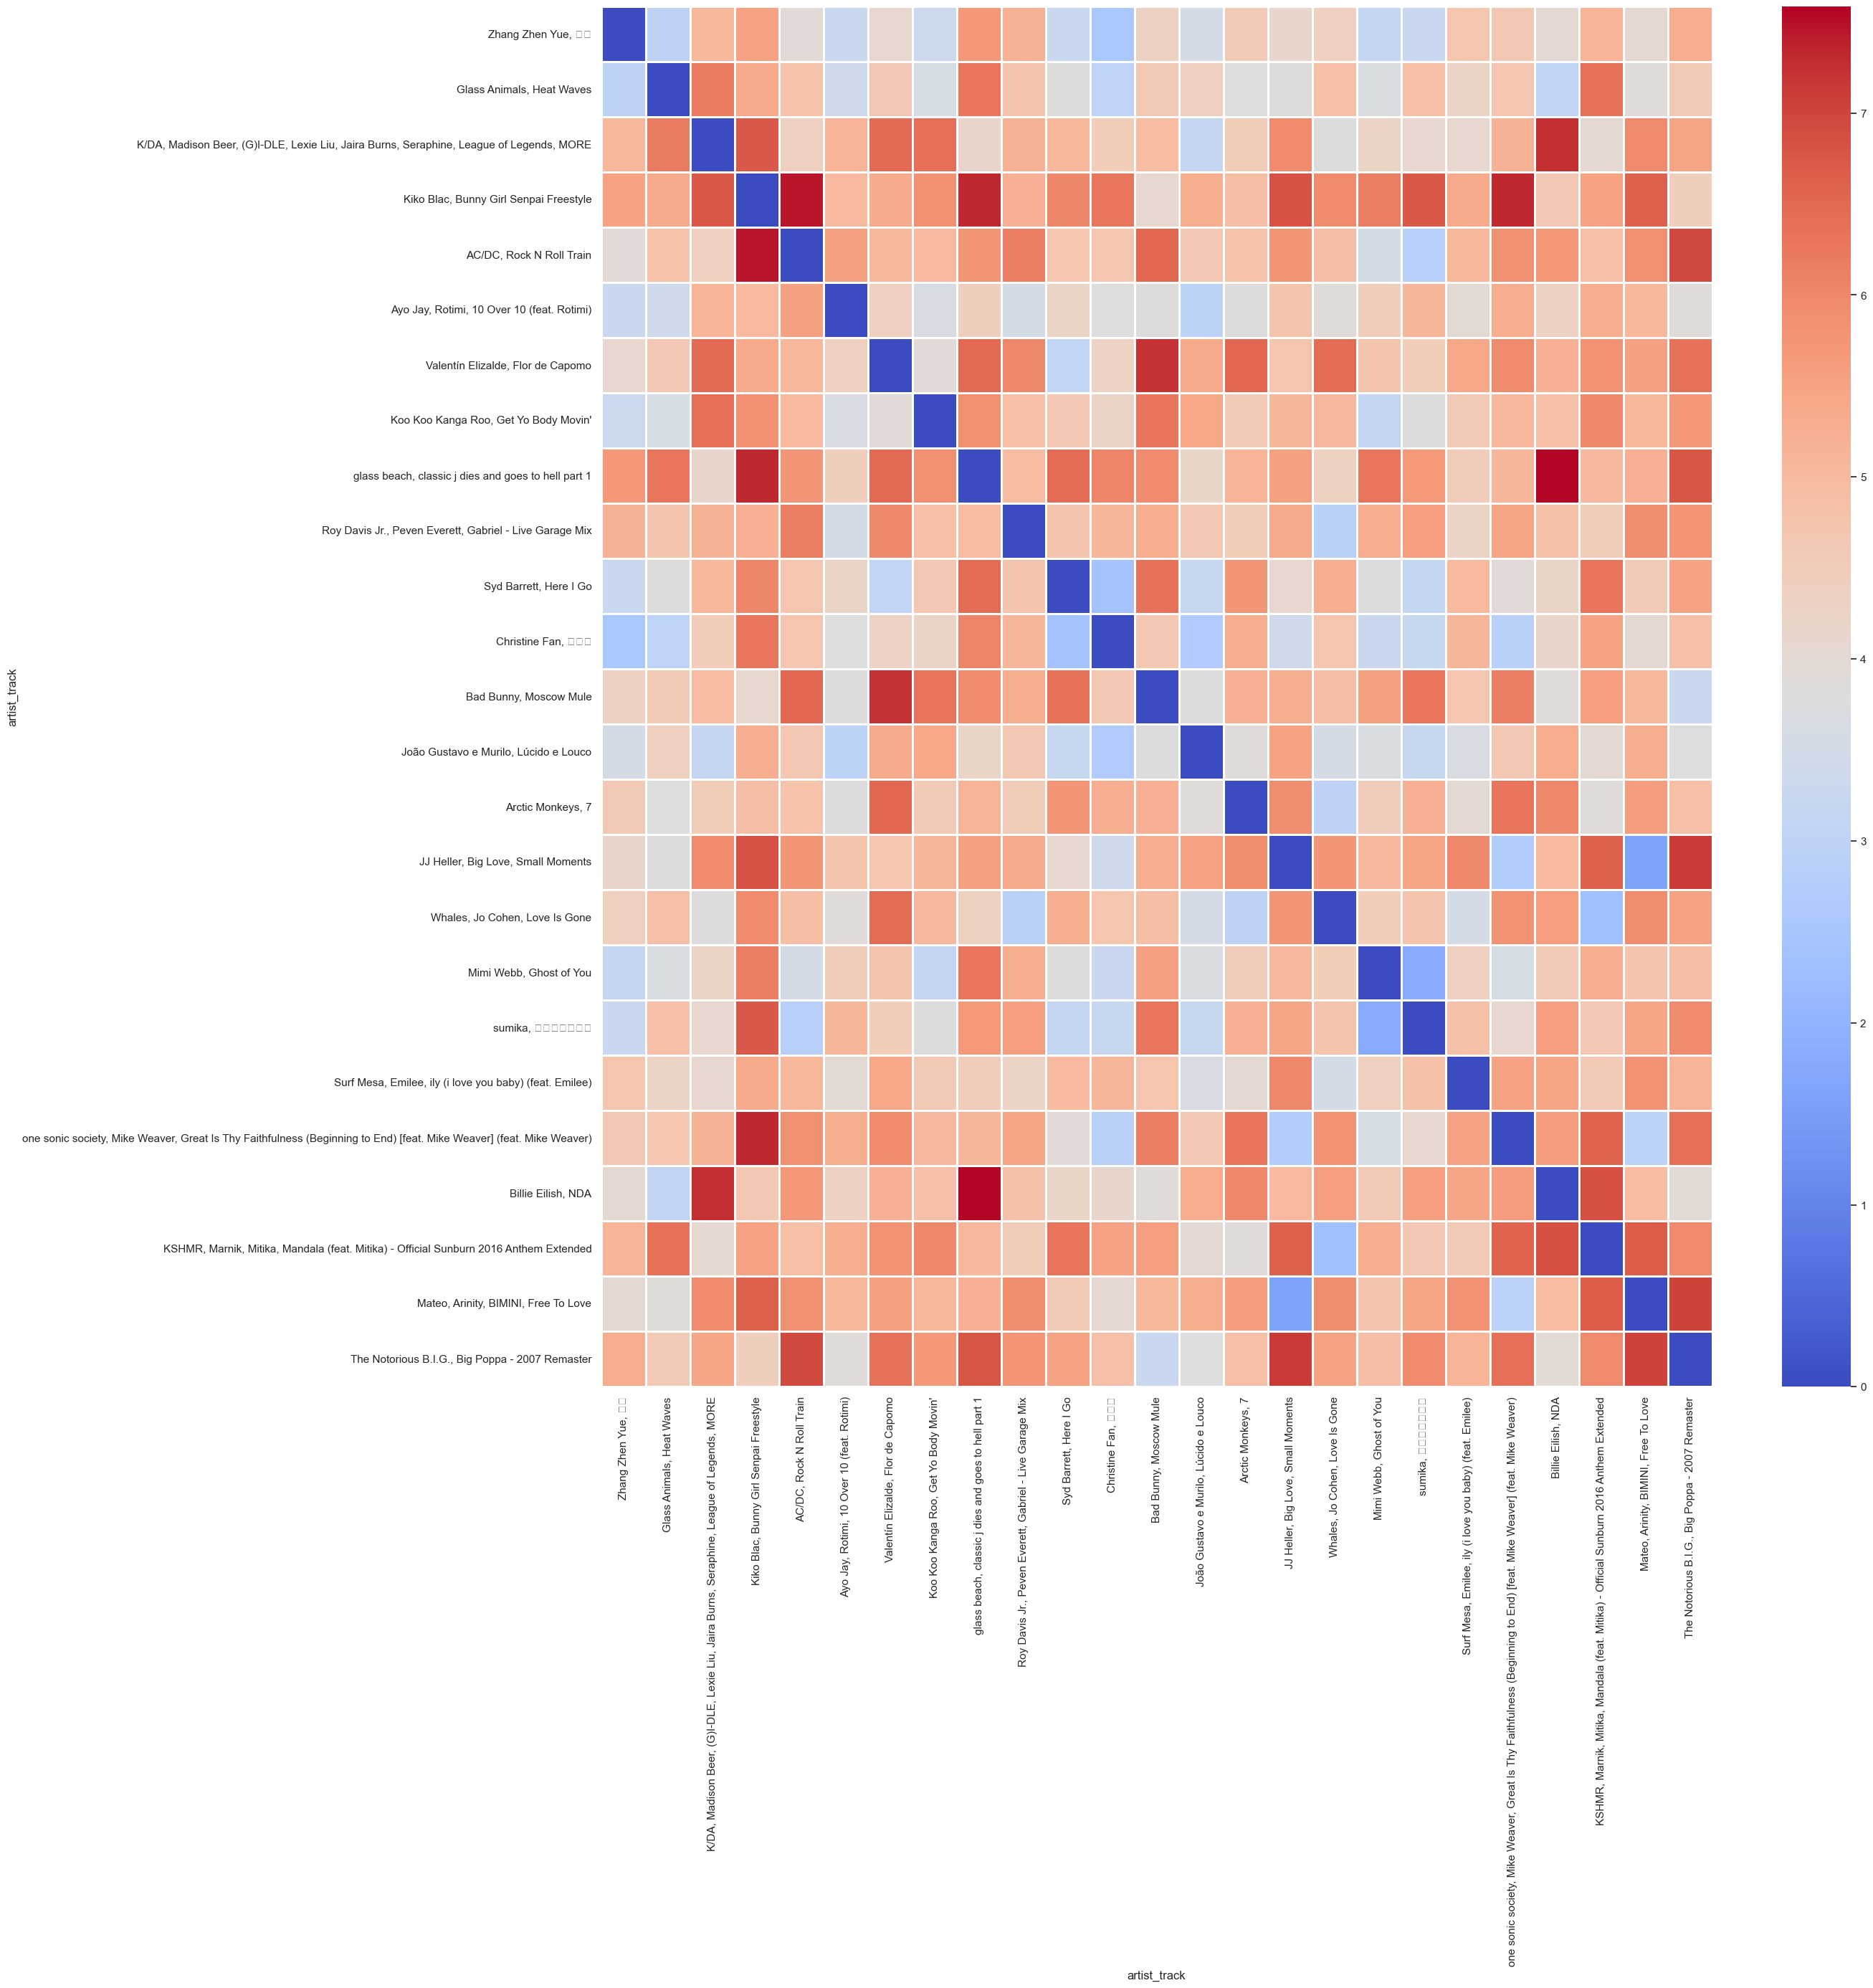

In [6]:
plt.figure(figsize = (25,25))
sns.heatmap(pairwise_sample, cmap = 'coolwarm', linewidth = 1);

# 